
**Python Blok Projesi**<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>

<p>Nobel Ödülü belki de dünyanın en tanınmış bilimsel ödülüdür. Her yıl kimya, edebiyat, fizik, tıp, ekonomi ve barış alanlarında bilim insanlarına ve akademisyenlere verilmektedir. Bu projede, Nobel Ödülü kazananları inceleyeceğiz. </p>

## Proje Soruları

1. Nobel Ödüllerini en çok kazanan ilk on ülkeyi bulunuz.
2. Nobel Ödüllerini kazanan ilk kadınları listeleyiniz.
3. Nobel Ödüllerini kazanan ilk erkekleri listeleyiniz.
4. Nobel ödülünü en çok kazanan ülkenin hangi yıldan itibaren hakimiyet sağladığını görselleştirip bu hakimiyette rol oynayan şeyler nelerdir? İçgörülerinizi paylaşır mısınız?
5. Nobel Ödülü kazananların cinsiyetlerini, yaşlarını, ödül kategorisi ve yılları kullanarak görselleştiriniz.(Her bir ödül kategorisi için ayrı grafik gösteriniz) Çıkan sonuçlara göre görseli yorumlayınız.
6. 1938-1945 yılı arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.
7. 1947-1991 yılları arasında Nobel Ödülü kazananların kategorilerini ve ülkelerini görselleştirip yorumlayınız.(Her kategori için ayrı bir grafik olması istenmektedir)
8. Kimya, Edebiyat, Barış, Fizik ve Tıp kategorilerindeki 2000 sonrasındaki kişilerin ülkelerini, yaşlarını görselleştirin.(Her bir Kategori için ayrı görselleştirme yapılması istenmektedir) Veriyi yorumlayınız.


In [2]:
import numpy as np   # Defining the libraries to be used
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nobel=pd.read_csv("Nobel.csv")   # Reading data from CSV file

In [4]:
nobel.info()   # An overview of the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [5]:
nobel.isnull().sum()  # Checking null values

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [6]:
nobel.head()  #Table analysis

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# NOTE: The main table, the "nobel" table, has been preserved as it is, and no editing or data deletion has been made on it.
#      A separate sub-table was created for each question. The subtable name is numbered with the number of questions.
#      For example, the subtable created for Question 1 is "nobel1", for Question 2 it is "nobel2", etc..
#     All edits such as data cleaning, type definition, and creation of new data columns are made in subtables.


# 1: Find the top ten countries that won the most Nobel Prizes.

In [7]:
nobel1=nobel.dropna(subset=["organization_country"])                      # Creating a subtable for question 1 from the main table
nobel_countries= nobel1.groupby("organization_country")["year"].count()   # Total number of awards won by each country
nobel_countries.sort_values(ascending=False).head(10)                     # Sort the list from most to least

organization_country
United States of America               341
United Kingdom                          89
Germany                                 43
France                                  36
Federal Republic of Germany             23
Switzerland                             21
Sweden                                  17
Japan                                   16
Netherlands                             11
Union of Soviet Socialist Republics      9
Name: year, dtype: int64

# 2: List the first women to win Nobel Prizes.

In [8]:
nobel2=nobel.dropna(subset=["sex"])                                        # Create a subtable
nobel_female=nobel2[nobel2["sex"]=="Female"]                               # Filter by gender
nobel_female.sort_values(by="year")["full_name"].reset_index(drop=True)    # Names of women who received awards, from old to new, according to years

0                           Marie Curie, née Sklodowska
1     Baroness Bertha Sophie Felicita von Suttner, n...
2                         Selma Ottilia Lovisa Lagerlöf
3                           Marie Curie, née Sklodowska
4                                        Grazia Deledda
5                                         Sigrid Undset
6                                           Jane Addams
7                                    Irène Joliot-Curie
8                                            Pearl Buck
9                                      Gabriela Mistral
10                                   Emily Greene Balch
11                      Gerty Theresa Cori, née Radnitz
12                                 Maria Goeppert Mayer
13                             Dorothy Crowfoot Hodgkin
14                                          Nelly Sachs
15                                       Betty Williams
16                                     Mairead Corrigan
17                                        Rosaly

In [65]:
nobel_female.sort_values(by="year")  #For all the details

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy
141,1928,Literature,The Nobel Prize in Literature 1928,"""principally for her powerful descriptions of ...",1/1,601,Individual,Sigrid Undset,1882-05-20,Kalundborg,Denmark,Female,NaN,NaN,NaN,1949-06-10,Lillehammer,Norway
160,1931,Peace,The Nobel Peace Prize 1931,NaN,1/2,496,Individual,Jane Addams,1860-09-06,"Cedarville, IL",United States of America,Female,NaN,NaN,NaN,1935-05-21,"Chicago, IL",United States of America
179,1935,Chemistry,The Nobel Prize in Chemistry 1935,"""in recognition of their synthesis of new radi...",1/2,194,Individual,Irène Joliot-Curie,1897-09-12,Paris,France,Female,Institut du Radium,Paris,France,1956-03-17,Paris,France
198,1938,Literature,The Nobel Prize in Literature 1938,"""for her rich and truly epic descriptions of p...",1/1,610,Individual,Pearl Buck,1892-06-26,"Hillsboro, WV",United States of America,Female,NaN,NaN,NaN,1973-03-06,"Danby, VT",United States of America
218,1945,Literature,The Nobel Prize in Literature 1945,"""for her lyric poetry which, inspired by power...",1/1,615,Individual,Gabriela Mistral,1889-04-07,Vicuña,Chile,Female,NaN,NaN,NaN,1957-01-10,"Hempstead, NY",United States of America


In [66]:
nobel_female[nobel_female["year"]==nobel_female["year"].min()]  #The first woman to win the Nobel Prize in history and her details

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France


# 3: List the first men to win Nobel Prizes.

In [9]:
nobel3=nobel.dropna(subset=["sex"])                                               # Create a subtable
nobel_male=nobel3[nobel3["sex"]=="Male"]                                          # Filter by gender
nobel_male.sort_values(by="year")["full_name"].reset_index(drop=True).head(6)    # Names of the men who received awards, from old to new, according to years

0    Jacobus Henricus van 't Hoff
1                 Sully Prudhomme
2          Emil Adolf von Behring
3               Jean Henry Dunant
4                  Frédéric Passy
5          Wilhelm Conrad Röntgen
Name: full_name, dtype: object

In [63]:
nobel_male[nobel_male["year"]==nobel_male["year"].min()]  #The first men to win the Nobel Prize in history and their details

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


# 4: List the year in which the country with the highest number of Nobel Prize winners dominated.

In [10]:
nobel4=nobel.dropna(subset=["organization_country"])                                                         # Create a subtable
max_nobel_by_year= nobel4.groupby("year")["organization_country"].apply(lambda x: x.value_counts().idxmax()) # Country with the most awards by year
max_nobel_by_year_table= pd.DataFrame(max_nobel_by_year)
max_nobel_by_year_table    

,organization_country
year,
1901,Germany
1902,Netherlands
1903,France
1904,United Kingdom
1905,Germany
...,...
2012,United States of America
2013,United States of America
2014,United States of America


In [11]:
max_nobel_by_year_table[max_nobel_by_year_table["organization_country"]=="United States of America"]   # Years with the highest earnings in the USA

,organization_country
year,
1914,United States of America
1933,United States of America
1934,United States of America
1943,United States of America
1944,United States of America
...,...
2012,United States of America
2013,United States of America
2014,United States of America


# 5: Visualize the Nobel Prize winners using their gender, age, award category and year.

In [12]:
nobel5= nobel[["year","sex","category","birth_date"]]       # Create a subtable
nobel5["birth_date"]= pd.to_datetime(nobel5["birth_date"])  # Converting date of birth from object to date type
nobel5["age"]= nobel5["year"]-nobel5["birth_date"].dt.year  # Calculating ages and adding them to the table
nobel5      

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\255437779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel5["birth_date"]= pd.to_datetime(nobel5["birth_date"])  # Object olan doğum tarihini date tipine çevirme
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\255437779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel5["age"]= nobel5["year"]-nobel5["birth_date"].dt.year  # Yaşları hesaplama ve tabloya ekleme


,year,sex,category,birth_date,age
0,1901,Male,Chemistry,1852-08-30,49.0
1,1901,Male,Literature,1839-03-16,62.0
2,1901,Male,Medicine,1854-03-15,47.0
3,1901,Male,Peace,1828-05-08,73.0
4,1901,Male,Peace,1822-05-20,79.0
...,...,...,...,...,...
906,2016,Male,Medicine,1945-02-09,71.0
907,2016,Male,Peace,1951-08-10,65.0
908,2016,Male,Physics,1934-09-21,82.0
909,2016,Male,Physics,1951-09-14,65.0


In [13]:
cat= nobel5["category"].unique()  # Category types
cat  

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [14]:
nobel5.isnull().sum()  # Checking null values

year           0
sex           26
category       0
birth_date    28
age           28
dtype: int64

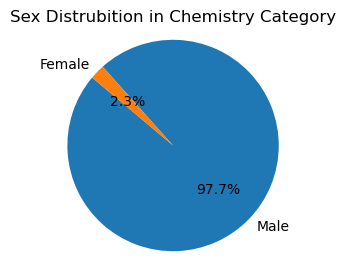

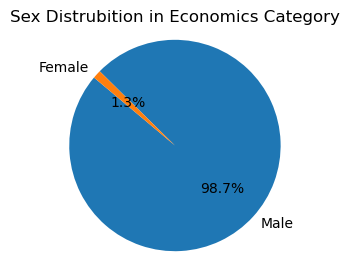

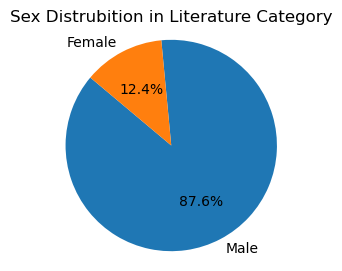

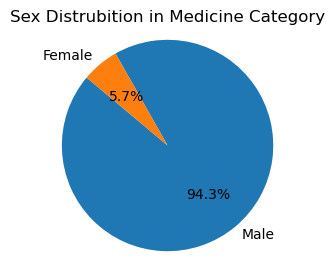

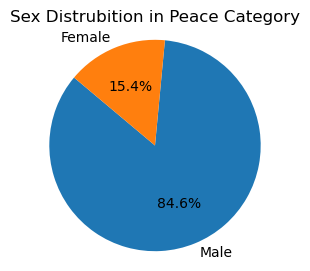

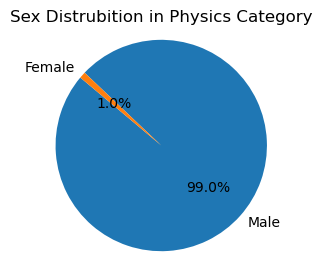

In [15]:
nobel5_sex= nobel5.dropna(subset=["sex"])      # Category based gender distribution
grouped = nobel5_sex.groupby("category")
for category, group in grouped:
    sex_counts= group["sex"].value_counts()
    plt.figure(figsize=(3,3))
    plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%", startangle=140)
    plt.title(f"Sex Distrubition in {category} Category")
    plt.axis("equal")

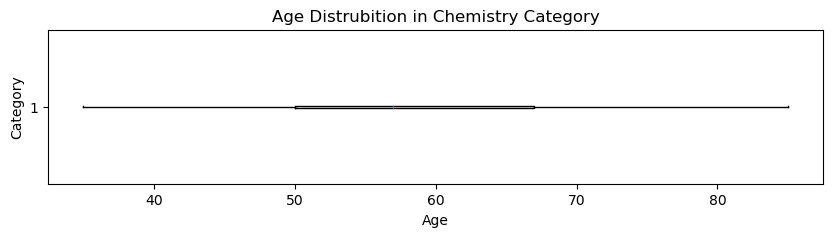

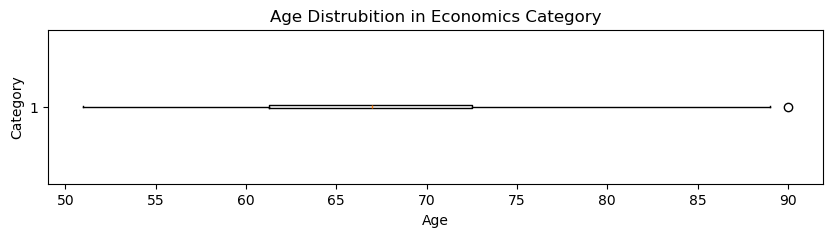

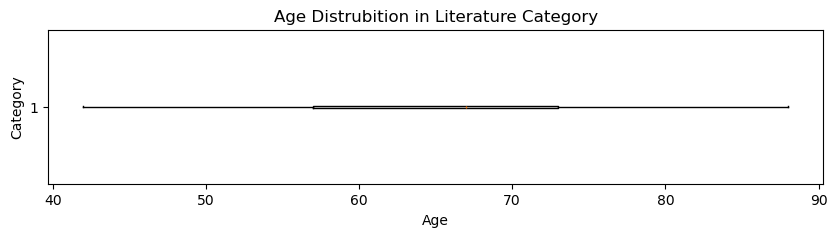

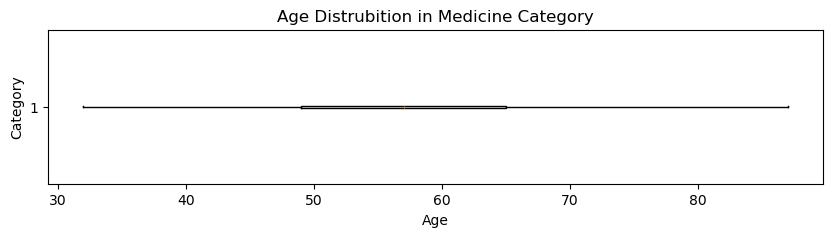

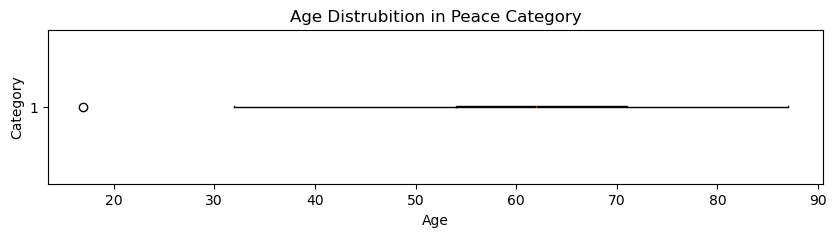

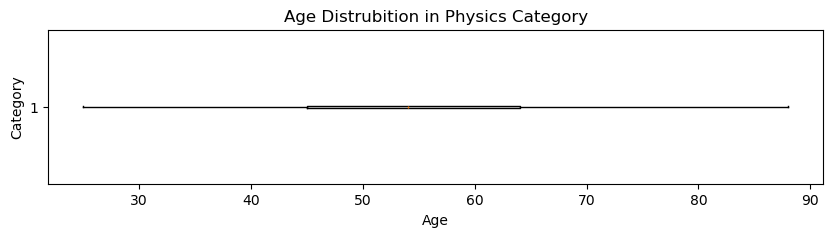

In [16]:
nobel5_age= nobel5.dropna(subset=["age"])      # Category based age distribution
grouped = nobel5_age.groupby("category")
for category, group in grouped:
    plt.figure(figsize=(10,2))
    plt.boxplot(group["age"], vert=False)
    plt.xlabel("Age")
    plt.ylabel("Category")
    plt.title(f"Age Distrubition in {category} Category")
    plt.axis("equal")

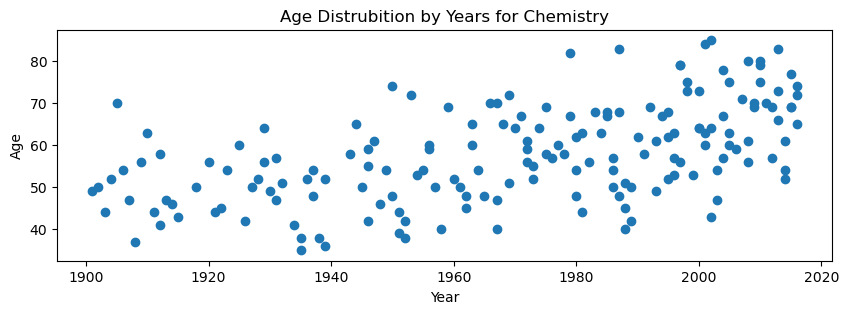

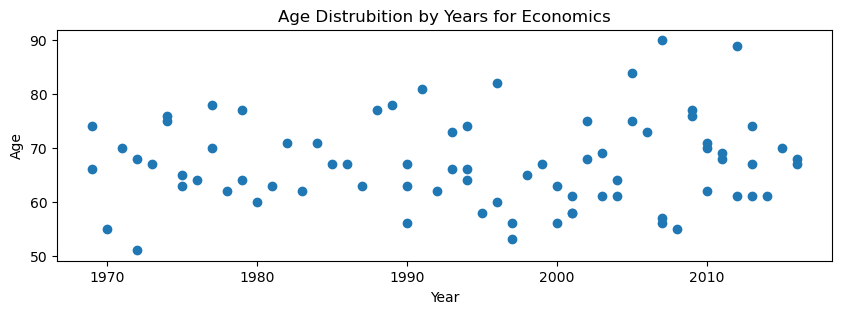

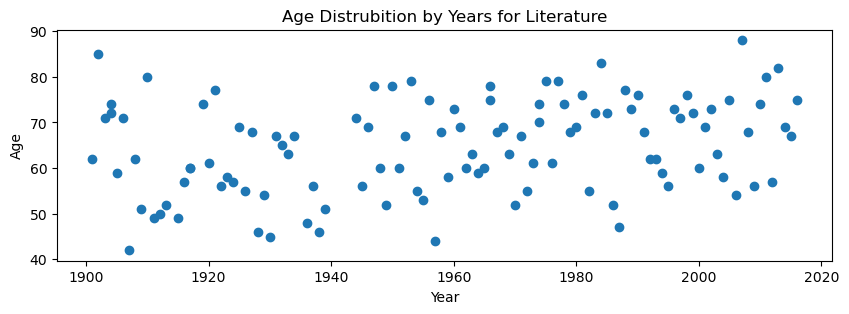

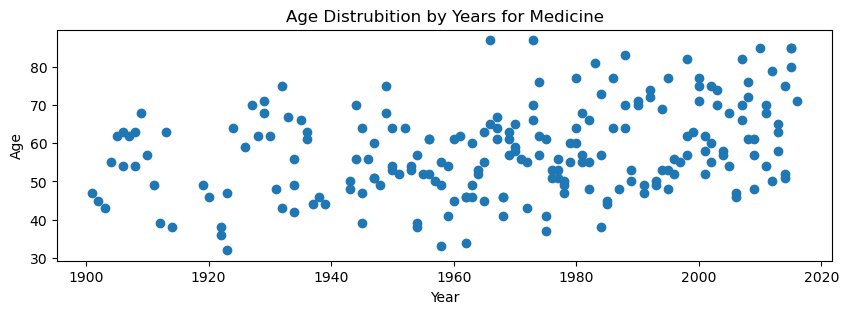

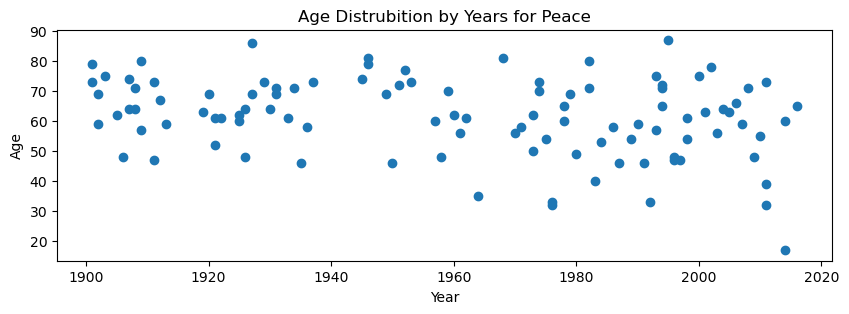

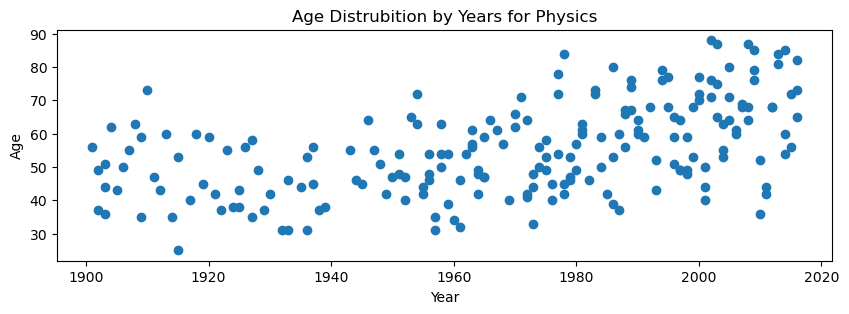

In [17]:
grouped = nobel5_age.groupby("category")    #Age distribution by years
for category, grup in grouped:
    plt.figure(figsize=(10,3))
    plt.scatter(grup["year"], grup["age"])
    plt.xlabel("Year")
    plt.ylabel("Age")
    plt.title(f"Age Distrubition by Years for {category}")
    plt.show()
    

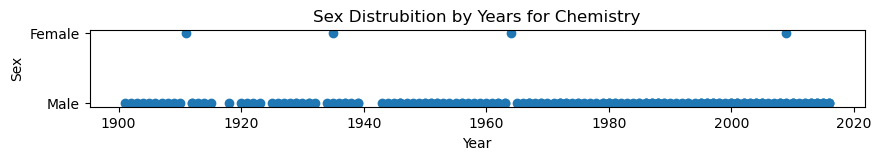

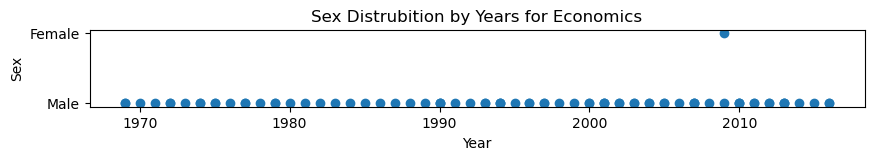

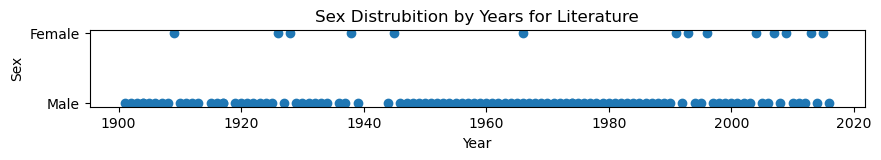

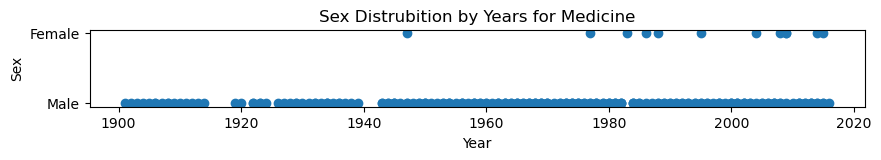

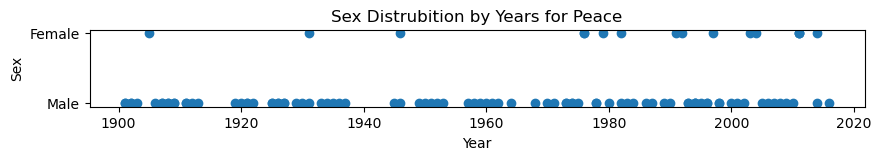

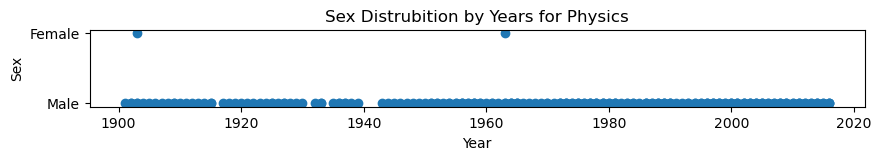

In [18]:
grouped = nobel5_sex.groupby("category")    #Gender distribution by years
for category, grup in grouped:
    plt.figure(figsize=(10,1))
    plt.scatter(grup["year"], grup["sex"])
    plt.xlabel("Year")
    plt.ylabel("Sex")
    plt.title(f"Sex Distrubition by Years for {category}")
    plt.show()

# 6: Visualize the categories and countries of Nobel Prize winners between 1938 and 1945.

In [21]:
nobel6= nobel[["year","category","organization_country"]]      # Subtable creation, cleaning and filtering
nobel6=nobel6.dropna(subset=["organization_country"])
nobel6=nobel6[(nobel6["year"]>=1938) & (nobel6["year"]<=1945)]
nobel6

,year,category,organization_country
197,1938,Chemistry,Germany
199,1938,Medicine,Belgium
201,1938,Physics,Italy
202,1939,Chemistry,Germany
203,1939,Chemistry,Switzerland
205,1939,Medicine,Germany
206,1939,Physics,United States of America
207,1943,Chemistry,Sweden
208,1943,Medicine,Denmark
209,1943,Medicine,United States of America


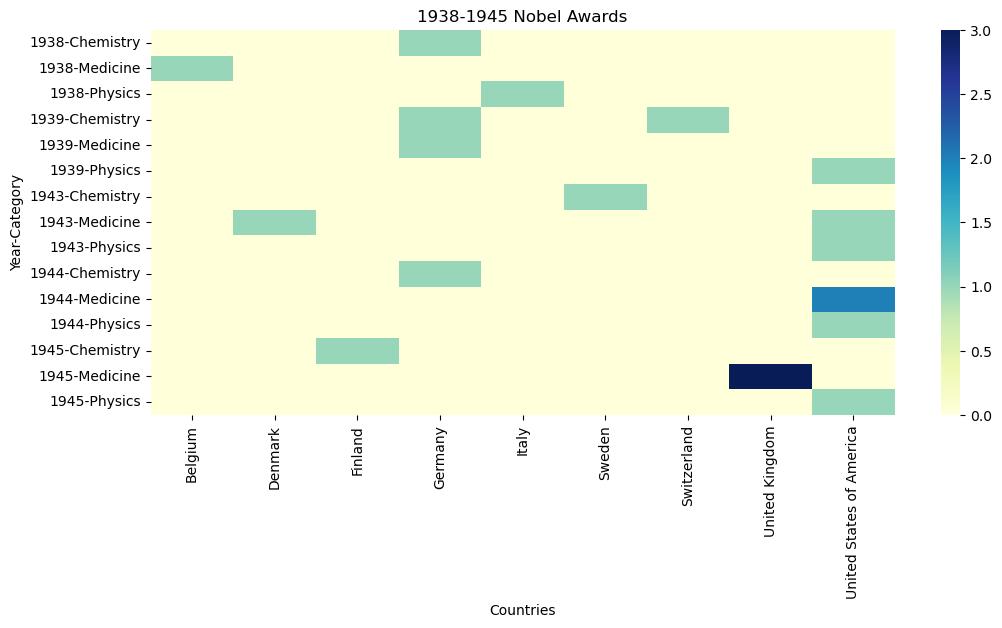

In [23]:
heatmap_df = nobel6.groupby(["year","category","organization_country"]).size().unstack(fill_value=0) # 1938-1945 awards
plt.figure(figsize=(12,5))                                                                           # Analysis with heatmap
sns.heatmap(heatmap_df,  fmt="d", cmap="YlGnBu")
plt.title("1938-1945 Nobel Awards")
plt.xlabel("Countries")
plt.ylabel("Year-Category")
plt.show()

# 7: Visualize the categories and countries of Nobel Prize winners between 1947 and 1991.

In [24]:
nobel7= nobel[["year","category","organization_country"]]       # Subtable creation, cleaning and filtering
nobel7=nobel7.dropna(subset=["organization_country"])
nobel7=nobel7[(nobel7["year"]>=1947) & (nobel7["year"]<=1991)]
nobel7

,year,category,organization_country
232,1947,Chemistry,United Kingdom
234,1947,Medicine,United States of America
235,1947,Medicine,United States of America
236,1947,Medicine,Argentina
239,1947,Physics,United Kingdom
...,...,...,...
613,1991,Chemistry,Switzerland
614,1991,Economics,United States of America
616,1991,Medicine,Federal Republic of Germany
617,1991,Medicine,Federal Republic of Germany


In [25]:
categories=nobel7["category"].unique()   # Category types
categories

array(['Chemistry', 'Medicine', 'Physics', 'Peace', 'Economics'],
      dtype=object)

In [26]:
palette_colors = ['#78C850',  # Grass      # Color plate defined for use in Scatterplot. 
                    '#F08030',  # Fire     # Ready-made color palettes cause confusion because they do not contain enough different colors. 
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\2350586072.py:5: UserWarning: The palette list has more values (15) than needed (14), which may not be intended.
  sns.scatterplot(data=category_nobel7, x="year", y="Amount", hue="organization_country", ax=axes[i], s=100, palette=palette_colors)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\2350586072.py:5: UserWarning: The palette list has more values (15) than needed (12), which may not be intended.
  sns.scatterplot(data=category_nobel7, x="year", y="Amount", hue="organization_country", ax=axes[i], s=100, palette=palette_colors)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\2350586072.py:5: UserWarning: The palette list has more values (15) than needed (12), which may not be intended.
  sns.scatterplot(data=category_nobel7, x="year", y="Amount", hue="organization_country", ax=axes[i], s=100, palette=palette_colors)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\2350586072.py:5: UserWarning: The palette list has more values

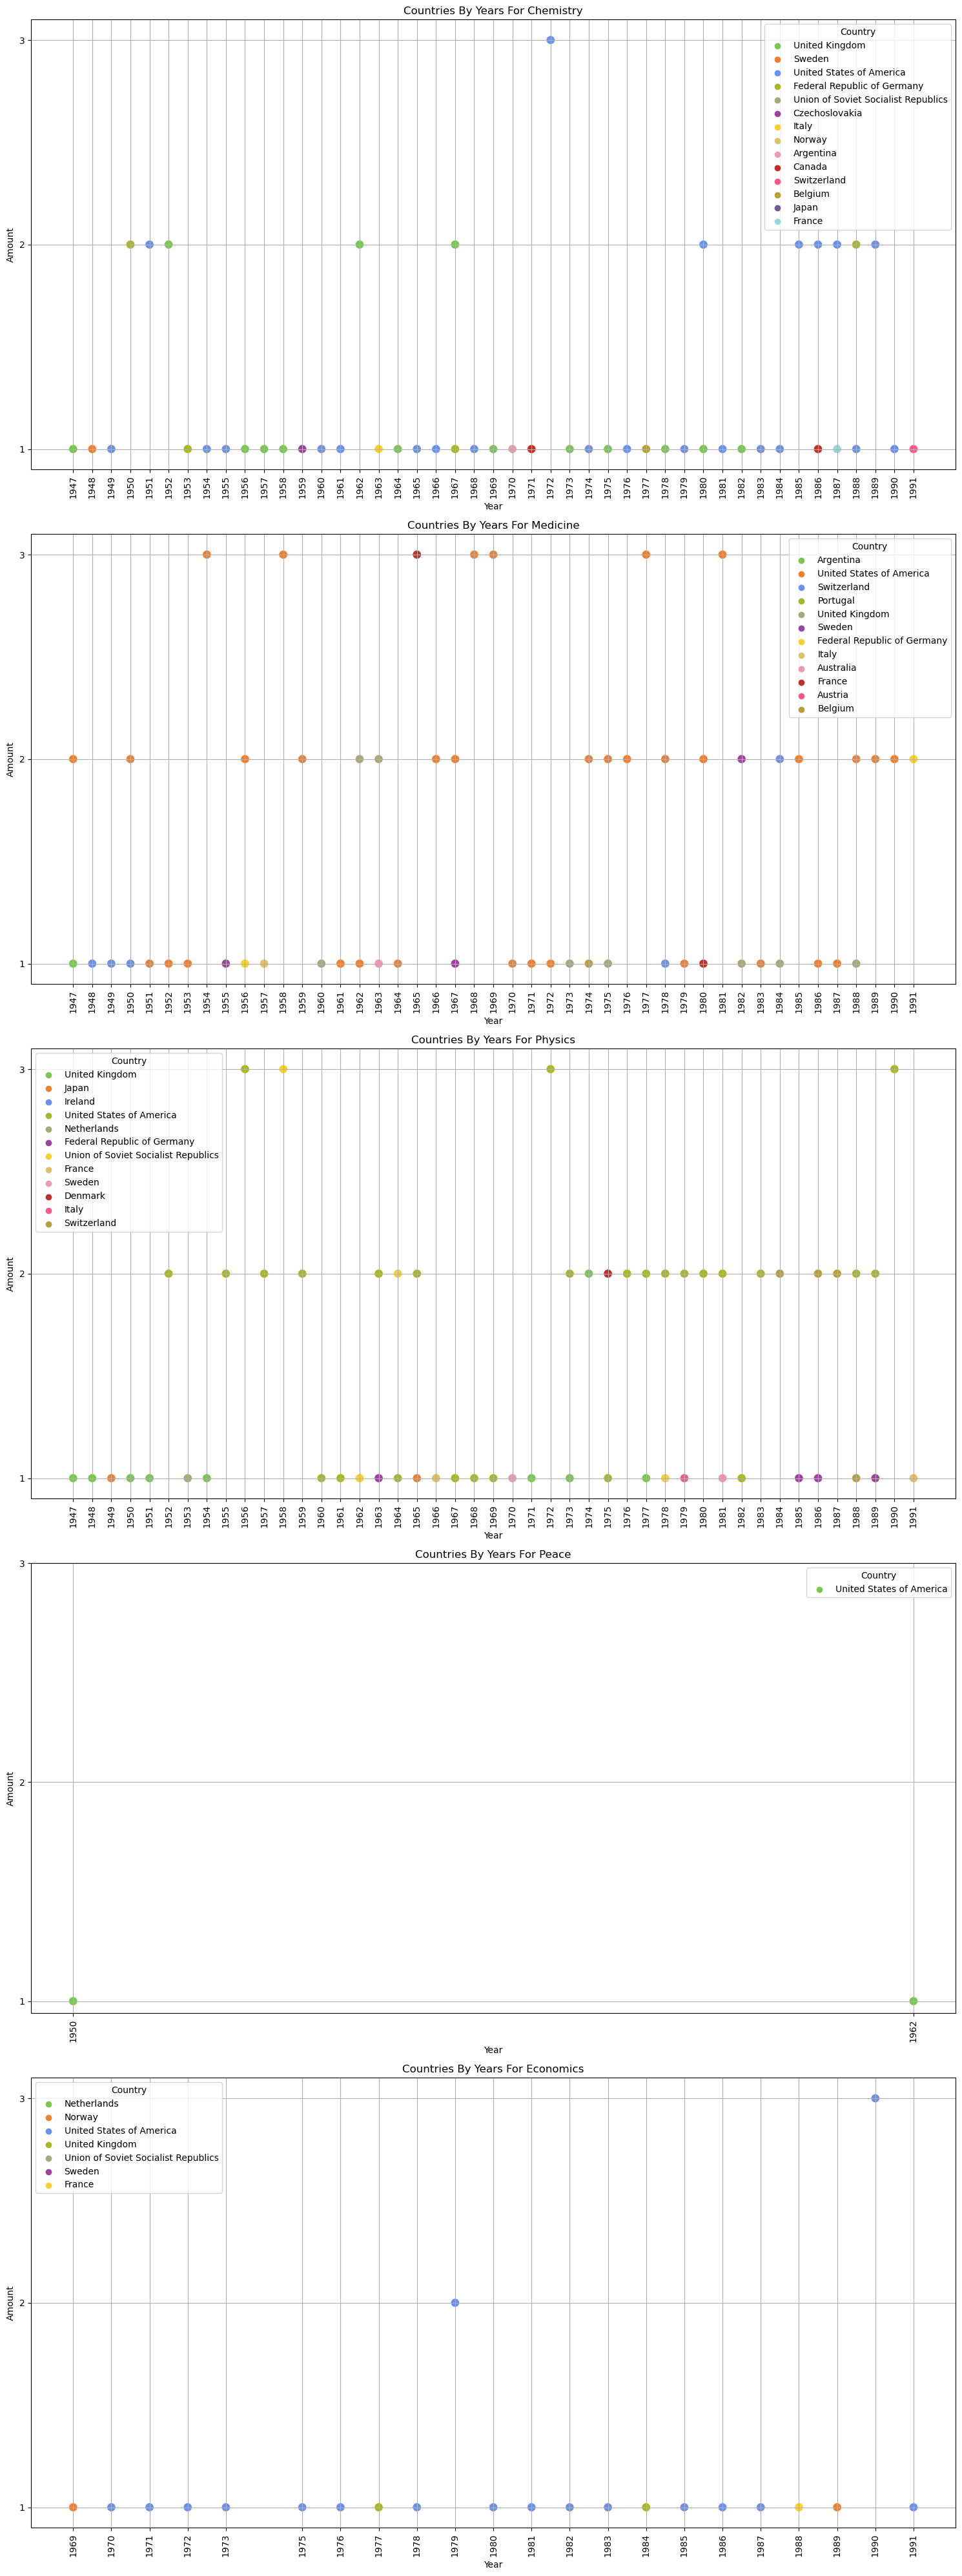

In [27]:
count_nobel7=nobel7.groupby(["year","category","organization_country"]).size().reset_index(name="Amount")  # Winning countries by year
fig, axes=plt.subplots(len(categories), 1, figsize=(15,8*len(categories)), sharex=False)                   # Analysis on scatterplot
for i, cat in enumerate(categories):
    category_nobel7=count_nobel7[count_nobel7["category"]==cat]
    sns.scatterplot(data=category_nobel7, x="year", y="Amount", hue="organization_country", ax=axes[i], s=100, palette=palette_colors)
    axes[i].set_title(f"Countries By Years For {cat}")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Amount")
    axes[i].legend(title="Country")
    axes[i].grid(True)
    axes[i].set_xticks(category_nobel7["year"].unique())
    axes[i].set_xticklabels(category_nobel7["year"].unique(), rotation=90)
    axes[i].set_yticks([1,2,3])
    
plt.tight_layout()
plt.show()

# 8: Visualize the countries and ages of people after 2000 in the categories of Chemistry, Literature, Peace, Physics and Medicine.

In [28]:
nobel8= nobel[["year","category","organization_country", "birth_date"]]      # Create child table and add age column
nobel8["birth_date"]= pd.to_datetime(nobel8["birth_date"])
nobel8["age"]= nobel8["year"]-nobel8["birth_date"].dt.year
nobel8=nobel8[nobel8["year"]>=2000] 
nobel8=nobel8[nobel8["category"]!="Economics"]
nobel8

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\1131237594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel8["birth_date"]= pd.to_datetime(nobel8["birth_date"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\1131237594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel8["age"]= nobel8["year"]-nobel8["birth_date"].dt.year


,year,category,organization_country,birth_date,age
706,2000,Chemistry,United States of America,1936-01-22,64.0
707,2000,Chemistry,United States of America,1927-04-14,73.0
708,2000,Chemistry,Japan,1936-08-20,64.0
711,2000,Literature,NaN,1940-01-04,60.0
712,2000,Medicine,Sweden,1923-01-25,77.0
...,...,...,...,...,...
906,2016,Medicine,Japan,1945-02-09,71.0
907,2016,Peace,NaN,1951-08-10,65.0
908,2016,Physics,United States of America,1934-09-21,82.0
909,2016,Physics,United States of America,1951-09-14,65.0


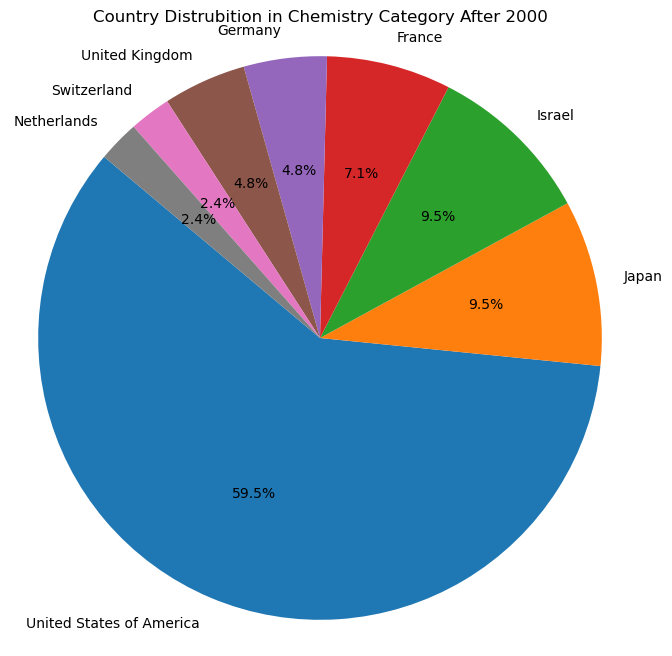

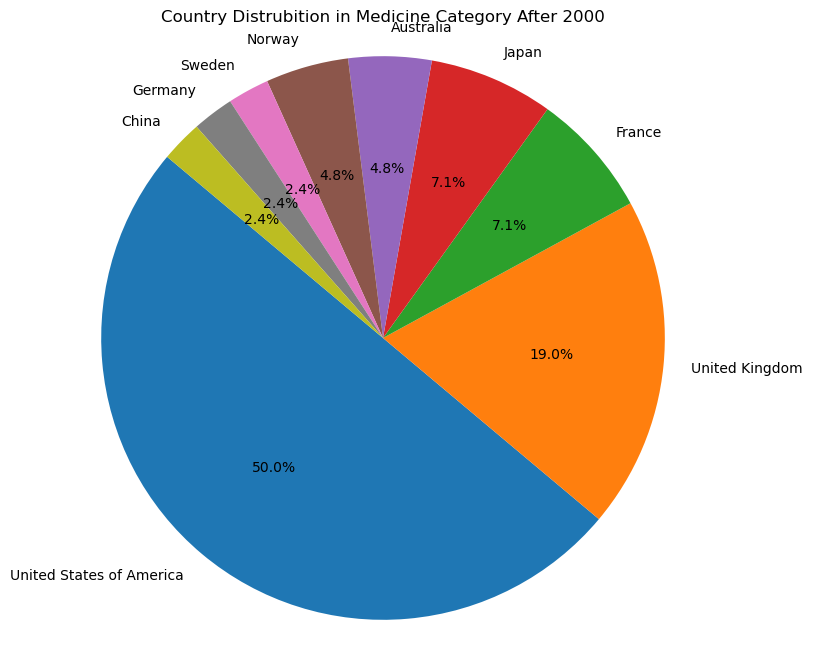

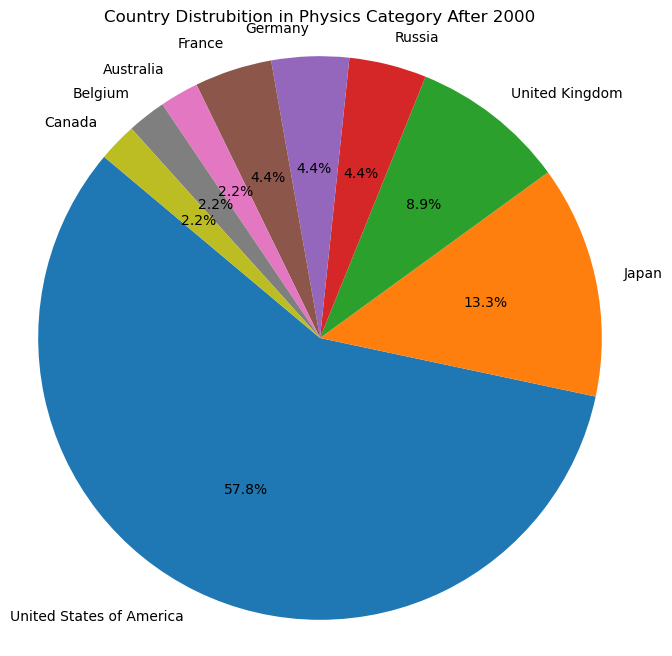

In [30]:
nobel8_country= nobel8.dropna(subset=["organization_country"])      # Category based country distribution
grouped = nobel8_country.groupby("category")
for category, group in grouped:
    country_counts= group["organization_country"].value_counts()
    plt.figure(figsize=(8,8))
    plt.pie(country_counts, labels=country_counts.index, autopct="%1.1f%%", startangle=140)
    plt.title(f"Country Distrubition in {category} Category After 2000")
    plt.axis("equal")

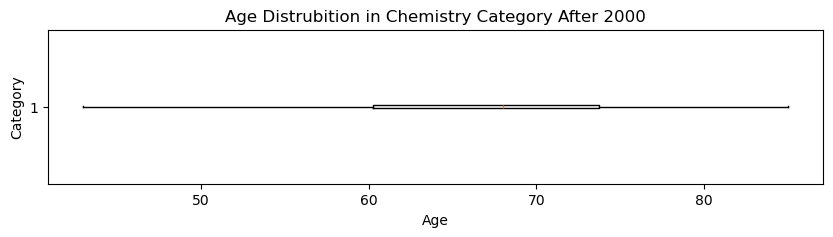

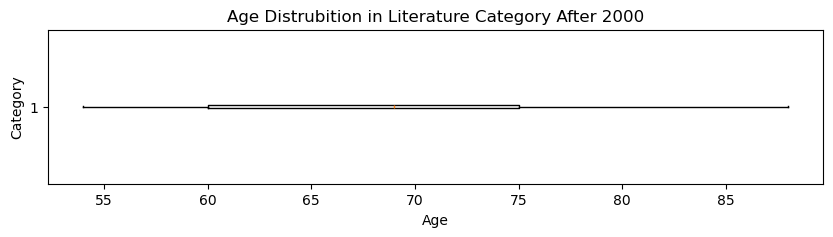

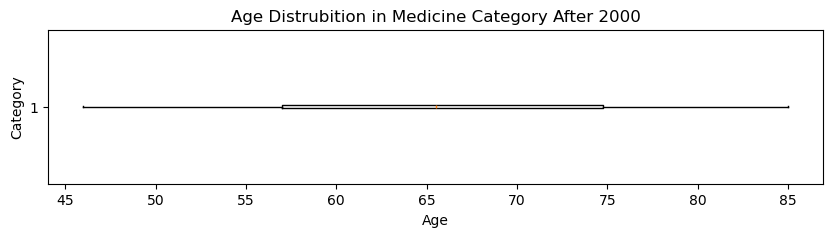

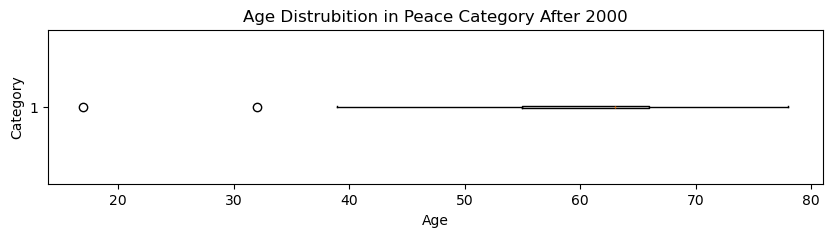

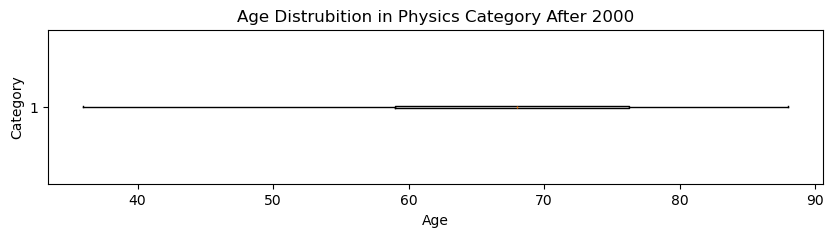

In [31]:
nobel8_age= nobel8.dropna(subset=["age"])      # Category based age distribution
grouped = nobel8_age.groupby("category")
for category, group in grouped:
    plt.figure(figsize=(10,2))
    plt.boxplot(group["age"], vert=False)
    plt.xlabel("Age")
    plt.ylabel("Category")
    plt.title(f"Age Distrubition in {category} Category After 2000")
    plt.axis("equal")

## Extra: Who were given posthumous awards?

In [43]:
nobel_ext= nobel[["year","category","full_name","organization_country", "birth_date","death_date"]]      # Create child table and add age column
nobel_ext["birth_date"]= pd.to_datetime(nobel_ext["birth_date"])
nobel_ext["death_date"]= pd.to_datetime(nobel_ext["death_date"])
nobel_ext["age"]= nobel_ext["year"]-nobel_ext["birth_date"].dt.year
nobel_ext["death_age"]=nobel_ext["death_date"].dt.year-nobel_ext["birth_date"].dt.year
nobel_ext= nobel_ext.dropna(subset=["age","death_age"])
nobel_ext

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\151361861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel_ext["birth_date"]= pd.to_datetime(nobel_ext["birth_date"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\151361861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel_ext["death_date"]= pd.to_datetime(nobel_ext["death_date"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\151361861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,year,category,full_name,organization_country,birth_date,death_date,age,death_age
0,1901,Chemistry,Jacobus Henricus van 't Hoff,Germany,1852-08-30,1911-03-01,49.0,59.0
1,1901,Literature,Sully Prudhomme,NaN,1839-03-16,1907-09-07,62.0,68.0
2,1901,Medicine,Emil Adolf von Behring,Germany,1854-03-15,1917-03-31,47.0,63.0
3,1901,Peace,Jean Henry Dunant,NaN,1828-05-08,1910-10-30,73.0,82.0
4,1901,Peace,Frédéric Passy,NaN,1822-05-20,1912-06-12,79.0,90.0
...,...,...,...,...,...,...,...,...
833,2010,Economics,Dale T. Mortensen,United States of America,1939-02-02,2014-01-09,71.0,75.0
836,2010,Medicine,Robert G. Edwards,United Kingdom,1925-09-27,2013-04-10,85.0,88.0
843,2011,Literature,Tomas Tranströmer,NaN,1931-04-15,2015-03-26,80.0,84.0
846,2011,Medicine,Ralph M. Steinman,United States of America,1943-01-14,2011-09-30,68.0,68.0


In [44]:
nobel_ext[nobel_ext["age"]>=nobel_ext["death_age"]] # Although it seems that no one has received an award after him/her death, there are those who received the award in the same year as the year he/she died.

,year,category,full_name,organization_country,birth_date,death_date,age,death_age
158,1931,Literature,Erik Axel Karlfeldt,NaN,1864-07-20,1931-04-08,67.0,67.0
331,1961,Peace,Dag Hjalmar Agne Carl Hammarskjöld,NaN,1905-07-29,1961-09-18,56.0,56.0
666,1996,Economics,William Vickrey,United States of America,1914-06-21,1996-10-11,82.0,82.0
846,2011,Medicine,Ralph M. Steinman,United States of America,1943-01-14,2011-09-30,68.0,68.0


## Analysis of countries or cities that received awards (null values)

In [60]:
nobel_ulkeler=nobel[["year","category","organization_city","organization_country"]]
nobel_ulkeler

,year,category,organization_city,organization_country
0,1901,Chemistry,Berlin,Germany
1,1901,Literature,NaN,NaN
2,1901,Medicine,Marburg,Germany
3,1901,Peace,NaN,NaN
4,1901,Peace,NaN,NaN
...,...,...,...,...
906,2016,Medicine,Tokyo,Japan
907,2016,Peace,NaN,NaN
908,2016,Physics,"Seattle, WA",United States of America
909,2016,Physics,"Princeton, NJ",United States of America


In [62]:
nobel_ulkeler[nobel_ulkeler["organization_city"].isnull() & nobel_ulkeler["organization_country"].isnull()] # There are 243 values ​​where both reward country and reward city are null

,year,category,organization_city,organization_country
1,1901,Literature,NaN,NaN
3,1901,Peace,NaN,NaN
4,1901,Peace,NaN,NaN
7,1902,Literature,NaN,NaN
9,1902,Peace,NaN,NaN
...,...,...,...,...
885,2014,Peace,NaN,NaN
893,2015,Literature,NaN,NaN
897,2015,Peace,NaN,NaN
905,2016,Literature,NaN,NaN


In [64]:
nobel_ulkeler=nobel_ulkeler.dropna(subset=["organization_city","organization_country"], how="all")
nobel_ulkeler

,year,category,organization_city,organization_country
0,1901,Chemistry,Berlin,Germany
2,1901,Medicine,Marburg,Germany
5,1901,Physics,Munich,Germany
6,1902,Chemistry,Berlin,Germany
8,1902,Medicine,Liverpool,United Kingdom
...,...,...,...,...
904,2016,Economics,"Cambridge, MA",United States of America
906,2016,Medicine,Tokyo,Japan
908,2016,Physics,"Seattle, WA",United States of America
909,2016,Physics,"Princeton, NJ",United States of America


In [65]:
nobel_ulkeler.isnull().sum()

year                    0
category                0
organization_city       1
organization_country    1
dtype: int64

In [69]:
nobel_aaa=nobel_ulkeler[nobel_ulkeler["organization_city"].isnull() | nobel_ulkeler["organization_country"].isnull()] #Reward city or reward country has 2 values ​​that are null
nobel_aaa

,year,category,organization_city,organization_country
142,1928,Medicine,Tunis,NaN
829,2010,Chemistry,NaN,United States of America


In [71]:
nobel_aaa["organization_country"]=nobel_aaa["organization_country"].fillna(nobel_aaa["organization_city"])
nobel_aaa

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1164\2172504093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel_aaa["organization_country"]=nobel_aaa["organization_country"].fillna(nobel_aaa["organization_city"])


,year,category,organization_city,organization_country
142,1928,Medicine,Tunis,Tunis
829,2010,Chemistry,NaN,United States of America
